# Metropolis algorithm example


Here we look at the Metropolis-Hastings algorithm, which is a Markov-Chain Monte Carlo (MCMC) technique. 

### Swig it, compile it, add it to the path

In [8]:
! swig -c++ -python swig/metropolis.i
! python3 swig/setup_metropolis.py build_ext --inplace

running build_ext
building '_metropolis' extension
aarch64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.7m -c swig/metropolis_wrap.cxx -o build/temp.linux-aarch64-3.7/swig/metropolis_wrap.o -I./ -std=c++11 -O3
aarch64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-z,relro -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 build/temp.linux-aarch64-3.7/swig/metropolis_wrap.o -o /home/pi/Documents/Git/tensorflow-probability-AdroitErudite/David/_metropolis.cpython-37m-aarch64-linux-gnu.so


In [9]:
import sys
import os
sys.path.append( os.path.abspath("swig") )

In [10]:
import metropolis
import numpy as np
import matplotlib.pyplot as plt

## Probability distribution

Make the probability distribution equal to a sum of Gaussians. 

In [11]:
A = [1., 1.75]
sigma = [1.0, 0.5]
center = [0.0, 6.0]
g = metropolis.gaussianD( A, sigma, center )

gvalsi = []
gxvals = np.linspace(-10,10,100)
for x in gxvals:
    gvalsi.append( g(x) )
gvals = np.array(gvalsi)

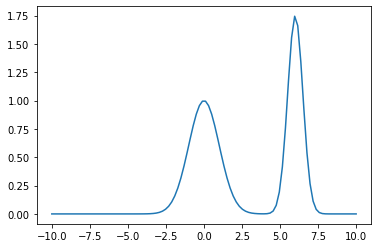

In [12]:
plt.plot(gxvals, gvals)
plt.show()

## Run Metropolis-Hastings

In [13]:

x0 = 0.0
delta = 1.0
nskip = 1000

m = metropolis.metropolisD( g, x0, delta, nskip, False )
xvals = []

nmcsteps = 1000
for i in range(nmcsteps):
    m.monte_carlo_step()
    xvals.append( m.get() )
    

## Plot the time series of the "walker"

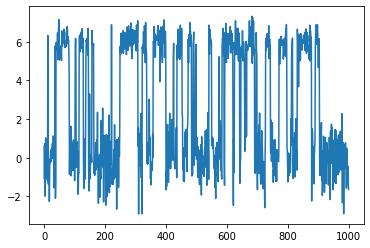

In [14]:
plt.plot(xvals)

## Plot the distribution that MH arrives at

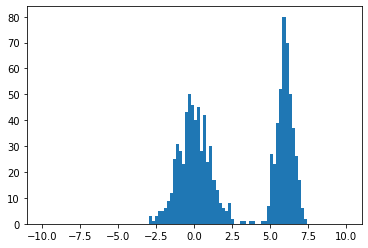

In [15]:
res = plt.hist( xvals, bins=100, range=(-10,10) )
plt.show()